## **Importing libraries and reading data:**

In [1]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/nezukokamaado/hr-metrics-and-analytics-repository"

od.download(dataset_url)

Skipping, found downloaded files in ".\hr-metrics-and-analytics-repository" (use force=True to force download)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("hr-metrics-and-analytics-repository/HR_data.csv")

## **Sanity check and data cleaning:**

In [4]:
df.shape

(1470, 41)

In [5]:
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,Over Time,Over18,Training Times Last Year,-2,0,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,Single,Yes,Y,0,-2,0,41,0,1102,1,Associates Degree,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,Married,No,Y,3,-2,0,49,1,279,8,High School,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,Single,Yes,Y,3,-2,0,37,0,1373,2,Associates Degree,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,Married,Yes,Y,3,-2,0,33,1,1392,3,Master's Degree,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,Married,No,Y,3,-2,0,27,1,591,2,High School,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2


In [6]:
# no null values present in the dataset
df.isnull().sum()

Attrition                     0
Business Travel               0
CF_age band                   0
CF_attrition label            0
Department                    0
Education Field               0
emp no                        0
Employee Number               0
Gender                        0
Job Role                      0
Marital Status                0
Over Time                     0
Over18                        0
Training Times Last Year      0
-2                            0
0                             0
Age                           0
CF_current Employee           0
Daily Rate                    0
Distance From Home            0
Education                     0
Employee Count                0
Environment Satisfaction      0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Percent Salary Hike           0
Performa

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [8]:
df.duplicated().sum()

0

In [9]:
# no duplicates present in the dataset and no garbage values present either
for i in df.select_dtypes(include="object").columns:
    print(f"COLUMN NAME IS: {i}")
    print(df[i].value_counts())
    print("-------------------------------------------------------------------")

COLUMN NAME IS: Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64
-------------------------------------------------------------------
COLUMN NAME IS: Business Travel
Business Travel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
-------------------------------------------------------------------
COLUMN NAME IS: CF_age band
CF_age band
25 - 34     554
35 - 44     505
45 - 54     245
Under 25     97
Over 55      69
Name: count, dtype: int64
-------------------------------------------------------------------
COLUMN NAME IS: CF_attrition label
CF_attrition label
Current Employees    1233
Ex-Employees          237
Name: count, dtype: int64
-------------------------------------------------------------------
COLUMN NAME IS: Department
Department
R&D      961
Sales    446
HR        63
Name: count, dtype: int64
-------------------------------------------------------------------
COLUMN NAME IS: Education Field
Education

In [10]:
df.tail()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,Over Time,Over18,Training Times Last Year,-2,0,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,Married,Yes,Y,2,-2,0,34,0,967,16,Master's Degree,1,4,85,1,1,1,2307,14460,1,23,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,Single,Yes,Y,3,-2,0,29,0,459,24,Associates Degree,1,4,73,2,1,4,2439,14753,1,24,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,Single,Yes,Y,2,-2,0,35,0,880,12,Master's Degree,1,4,36,3,2,4,4581,10414,3,24,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,Single,Yes,Y,2,-2,0,22,0,391,7,High School,1,4,75,3,1,2,2472,26092,1,23,4,1,80,0,1,3,1,0,0,0
1469,Yes,Travel_Rarely,Under 25,Ex-Employees,Sales,Life Sciences,STAFF-1702,1702,Male,Sales Representative,Divorced,Yes,Y,2,-2,0,23,0,427,7,Bachelor's Degree,1,3,99,3,1,4,2275,25103,1,21,4,2,80,1,3,3,3,2,0,2


In [11]:
df.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', '-2', '0', 'Age', 'CF_current Employee',
       'Daily Rate', 'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [12]:
df.drop(["-2", "0", "Over18", "emp no", "Employee Count", "Standard Hours", "CF_attrition label"], axis=1, inplace=True)

In [13]:
df.shape

(1470, 34)

In [14]:
df["Attrition"] = df["Attrition"].replace({"Yes": 1, "No": 0}, regex=True)

In [15]:
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0}, regex=True)

In [16]:
df["Marital Status"] = df["Marital Status"].replace({"Married": 1, "Single": 0, "Divorced": -1}, regex=True)

In [17]:
df["Over Time"] = df["Over Time"].replace({"Yes": 1, "No": 0}, regex=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   int64 
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   Department                  1470 non-null   object
 4   Education Field             1470 non-null   object
 5   Employee Number             1470 non-null   int64 
 6   Gender                      1470 non-null   int64 
 7   Job Role                    1470 non-null   object
 8   Marital Status              1470 non-null   int64 
 9   Over Time                   1470 non-null   int64 
 10  Training Times Last Year    1470 non-null   int64 
 11  Age                         1470 non-null   int64 
 12  CF_current Employee         1470 non-null   int64 
 13  Daily Rate                  1470 non-null   int6

In [20]:
df["Marital Status"] = pd.to_numeric(df["Marital Status"])

In [21]:
df["Business Travel"].value_counts()

Business Travel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [22]:
df["Business Travel"] = df["Business Travel"].replace({"Travel_": "", "-Travel": "", "Non": "Never"}, regex=True)

In [23]:
df["Business Travel"].value_counts()

Business Travel
Rarely        1043
Frequently     277
Never          150
Name: count, dtype: int64

In [26]:
df.head()

,Attrition,Business Travel,CF_age band,Department,Education Field,Employee Number,Gender,Job Role,Marital Status,Over Time,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,Rarely,35 - 44,Sales,Life Sciences,1,0,Sales Executive,0,1,0,41,0,1102,1,Associates Degree,2,94,3,2,4,5993,19479,8,11,3,1,0,8,1,6,4,0,5
1,0,Frequently,45 - 54,R&D,Life Sciences,2,1,Research Scientist,1,0,3,49,1,279,8,High School,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,10,7,1,7
2,1,Rarely,35 - 44,R&D,Other,4,1,Laboratory Technician,0,1,3,37,0,1373,2,Associates Degree,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,0,0,0,0
3,0,Frequently,25 - 34,R&D,Life Sciences,5,0,Research Scientist,1,1,3,33,1,1392,3,Master's Degree,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,8,7,3,0
4,0,Rarely,25 - 34,R&D,Medical,7,1,Laboratory Technician,1,0,3,27,1,591,2,High School,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,2,2,2,2


## **Statistical summary:**

In [24]:
df.describe()

,Attrition,Employee Number,Gender,Marital Status,Over Time,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,1024.865306,0.600000,0.235374,0.282993,2.799320,36.923810,0.838776,802.485714,9.192517,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,602.024335,0.490065,0.790757,0.450606,1.289271,9.135373,0.367863,403.509100,8.106864,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,18.000000,0.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,491.250000,0.000000,0.000000,0.000000,2.000000,30.000000,1.000000,465.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,1020.500000,1.000000,0.000000,0.000000,3.000000,36.000000,1.000000,802.000000,7.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,1555.750000,1.000000,1.000000,1.000000,3.000000,43.000000,1.000000,1157.000000,14.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,2068.000000,1.000000,1.000000,1.000000,6.000000,60.000000,1.000000,1499.000000,29.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
df.describe(include="object").T

,count,unique,top,freq
Business Travel,1470,3,Rarely,1043
CF_age band,1470,5,25 - 34,554
Department,1470,3,R&D,961
Education Field,1470,6,Life Sciences,606
Job Role,1470,9,Sales Executive,326
Education,1470,5,Bachelor's Degree,572


## **Univariate analysis for categorical features:**

In [32]:
df.select_dtypes(include="object").columns

Index(['Business Travel', 'CF_age band', 'Department', 'Education Field',
       'Job Role', 'Education'],
      dtype='object')

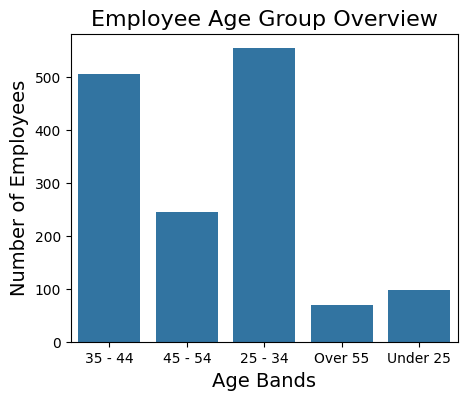

In [40]:
plt.figure(figsize=(5, 4))

sns.countplot(data=df, x="CF_age band")

plt.title('Employee Age Group Overview', fontsize=16)
plt.xlabel('Age Bands', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

plt.show()

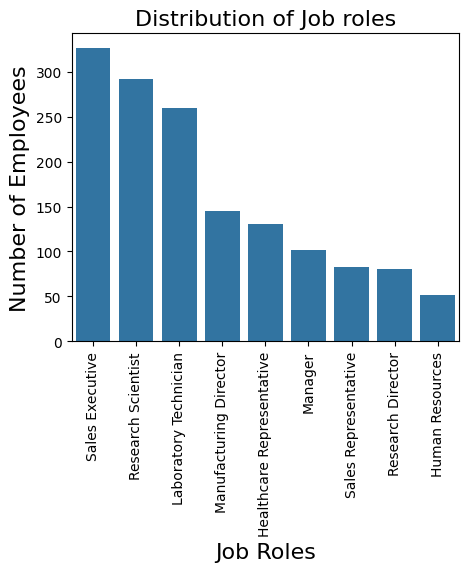

In [42]:
plt.figure(figsize=(5, 4))

sns.countplot(data=df, x="Job Role")

plt.title("Distribution of Job roles", fontsize=16)
plt.xlabel("Job Roles", fontsize=16)
plt.ylabel('Number of Employees', fontsize=16)
plt.xticks(rotation=90)

plt.show()

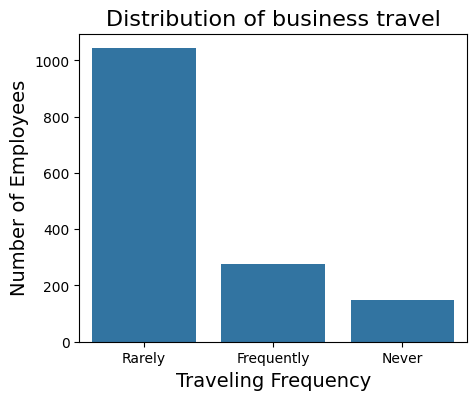

In [50]:
plt.figure(figsize=(5, 4))

sns.countplot(data=df, x="Business Travel")

plt.title('Distribution of business travel', fontsize=16)
plt.xlabel('Traveling Frequency', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

plt.show()

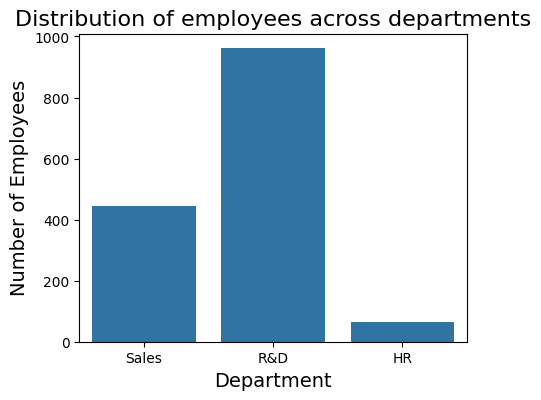

In [51]:
plt.figure(figsize=(5, 4))

sns.countplot(data=df, x="Department")

plt.title('Distribution of employees across departments', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

plt.show()

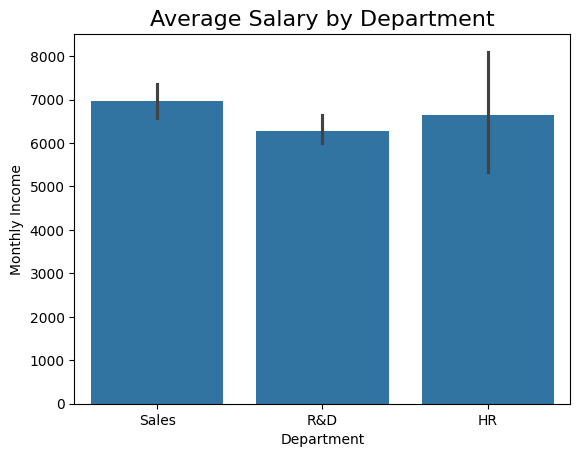

In [53]:
sns.barplot(x='Department', y='Monthly Income', data=df)
plt.title('Average Salary by Department', fontsize=16)
plt.show()


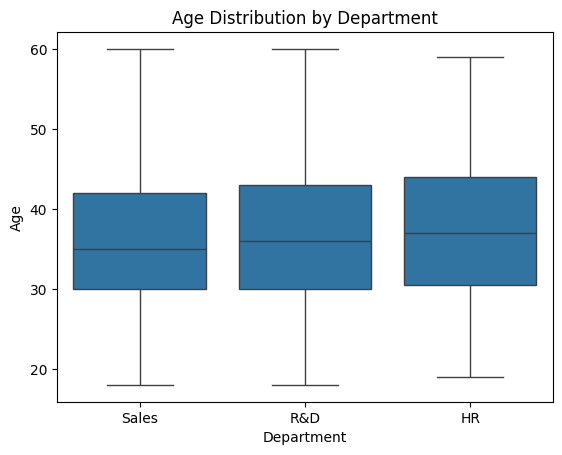

In [54]:
sns.boxplot(x='Department', y='Age', data=df)
plt.title('Age Distribution by Department')
plt.show()

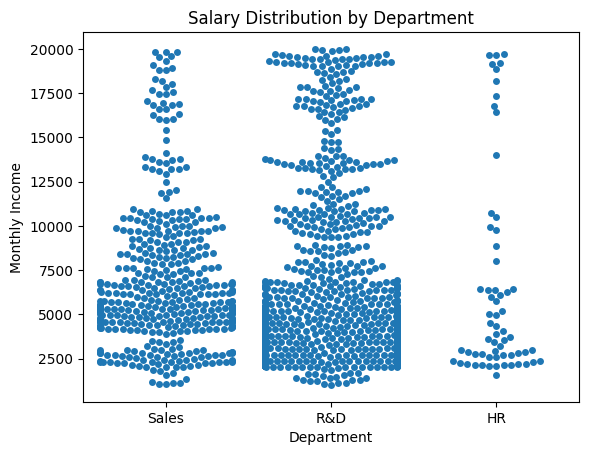

In [62]:
import warnings
warnings.filterwarnings("ignore")

sns.swarmplot(x='Department', y='Monthly Income', data=df)
plt.title('Salary Distribution by Department')
plt.show()


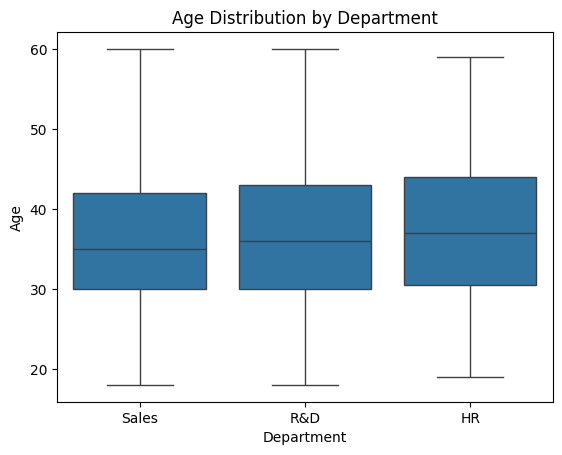

In [60]:
sns.boxplot(x='Department', y='Age', data=df)
plt.title('Age Distribution by Department')
plt.show()

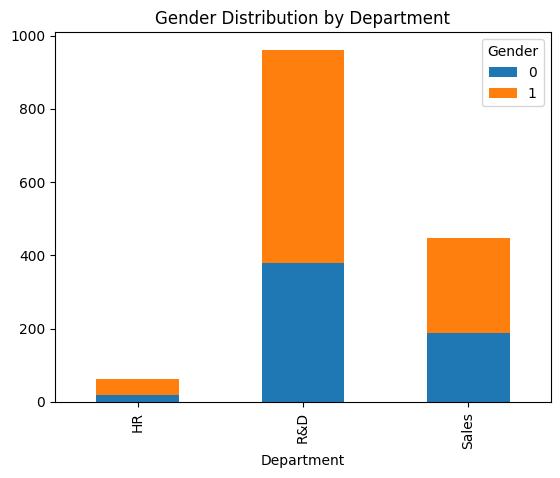

In [61]:
pd.crosstab(df['Department'], df['Gender']).plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Department')
plt.show()

## **Univariate analysis for numerical features:**

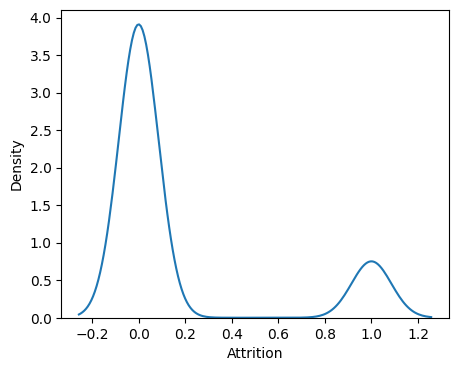

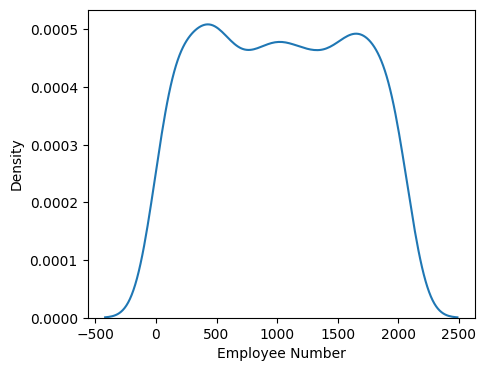

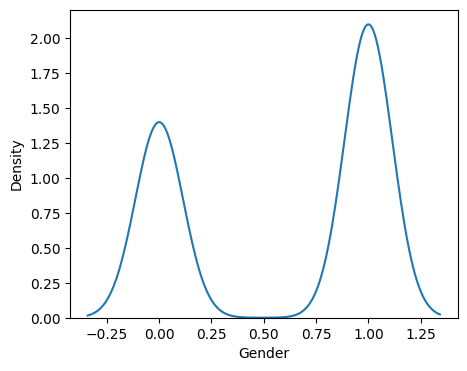

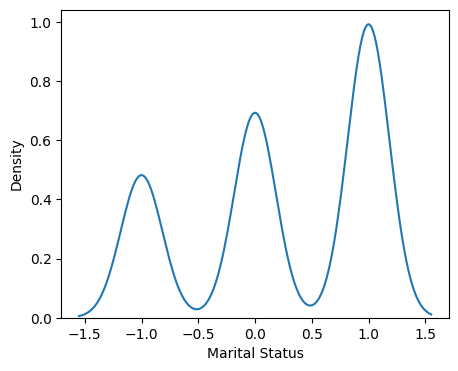

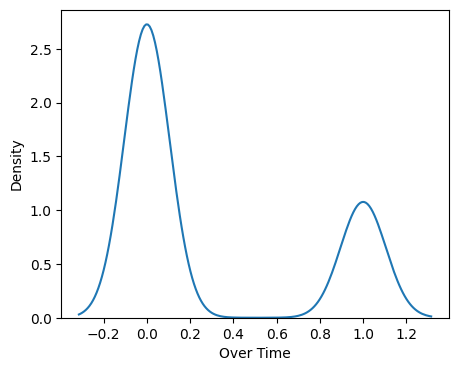

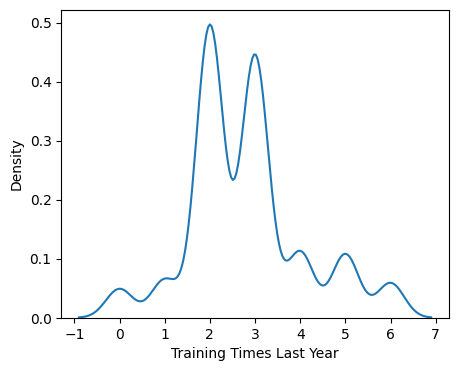

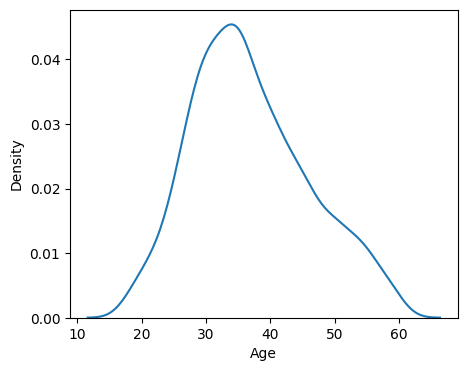

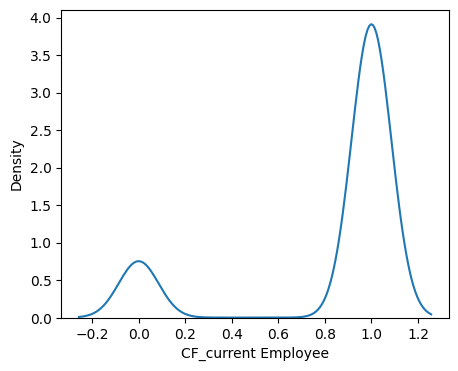

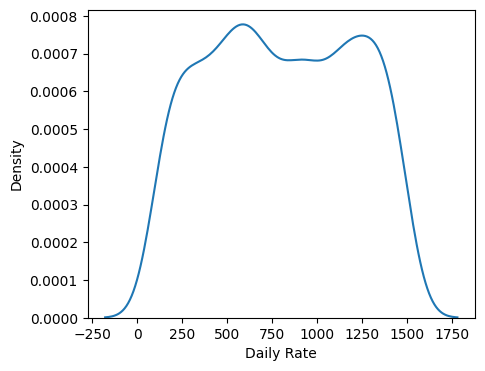

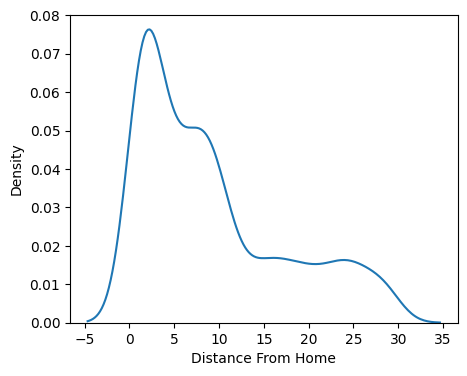

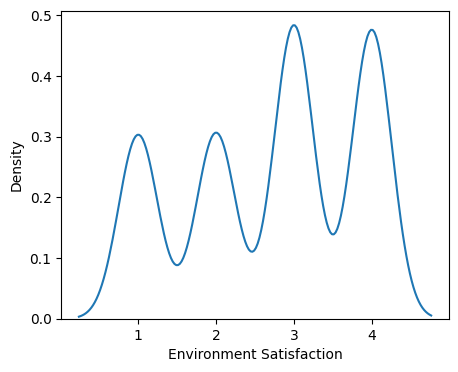

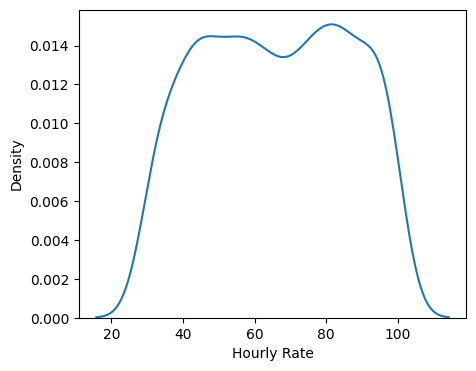

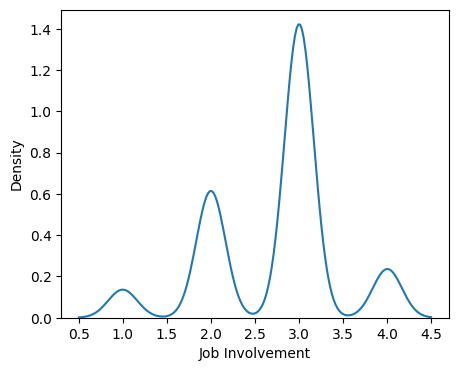

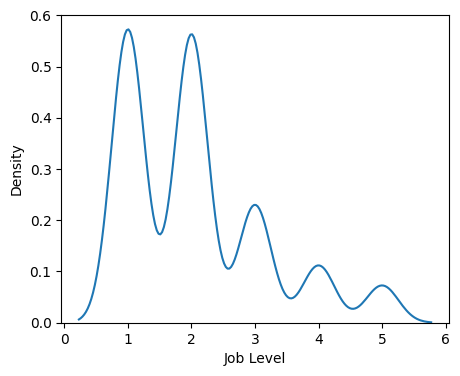

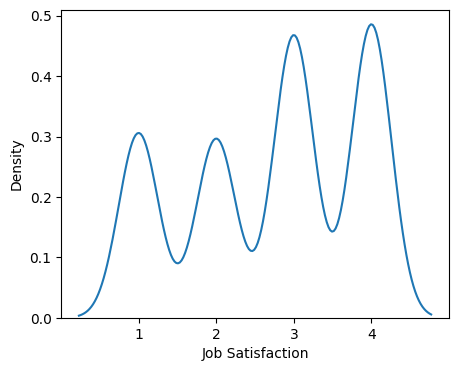

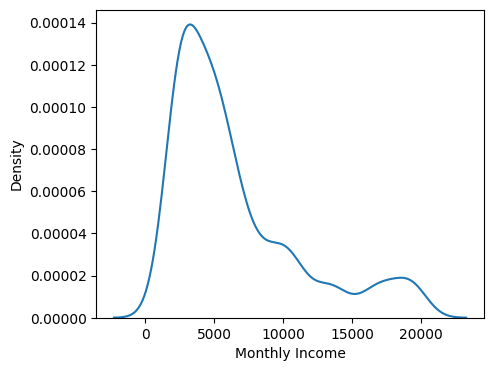

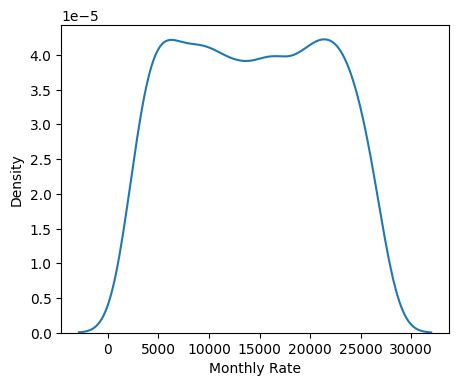

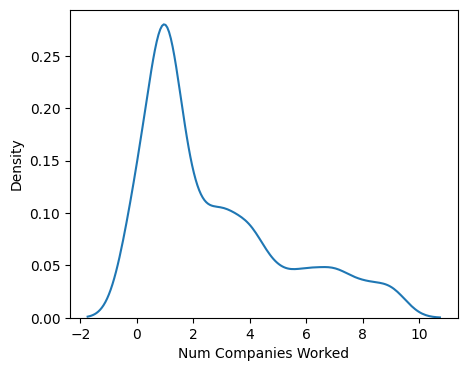

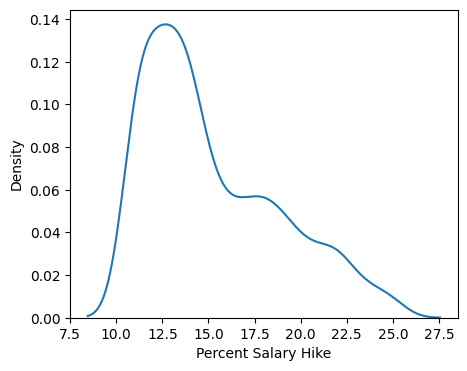

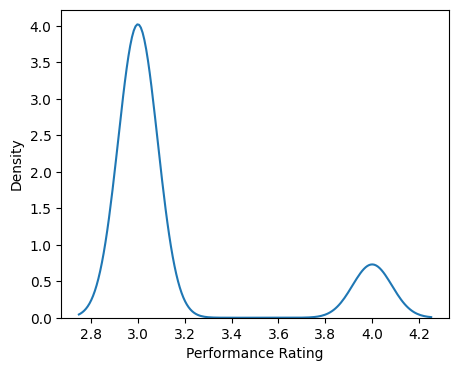

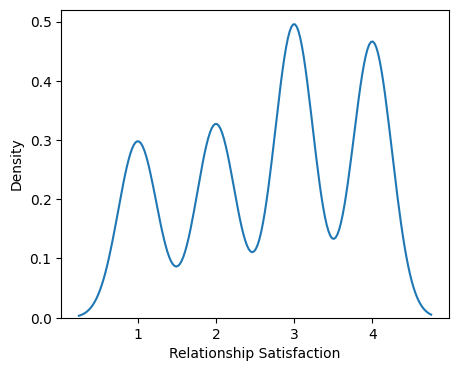

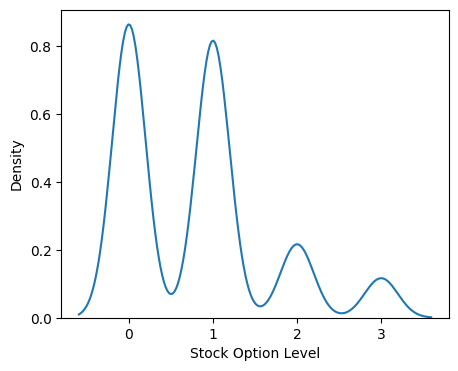

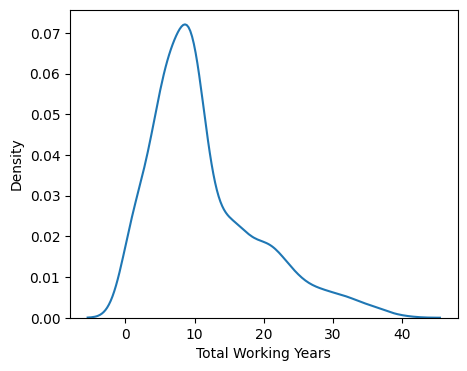

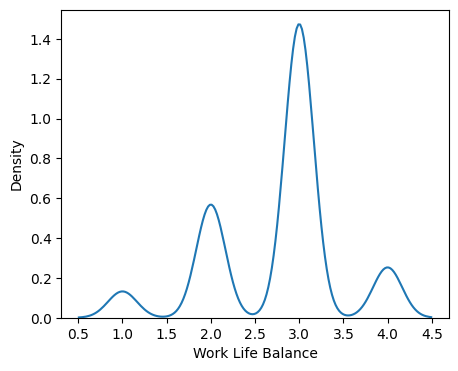

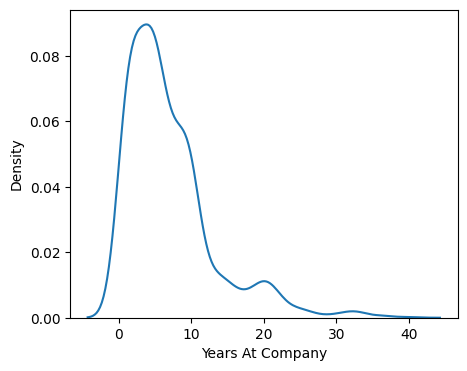

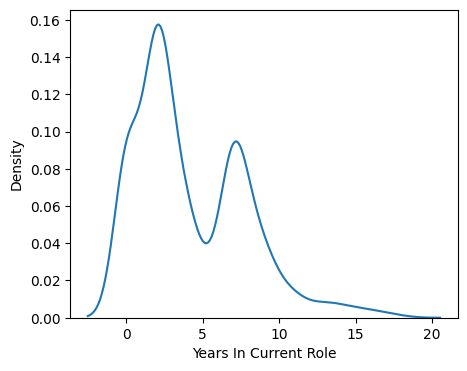

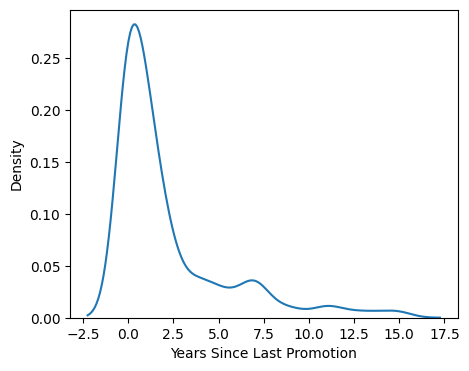

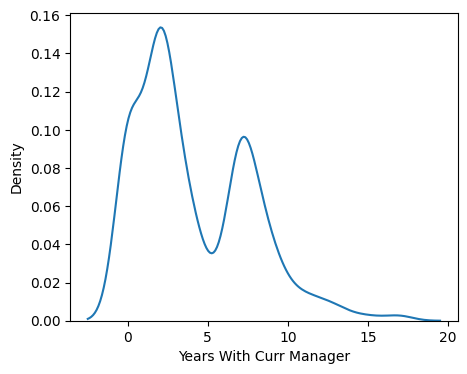

In [63]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(5, 4))
    sns.kdeplot(data=df, x=i)
    plt.show

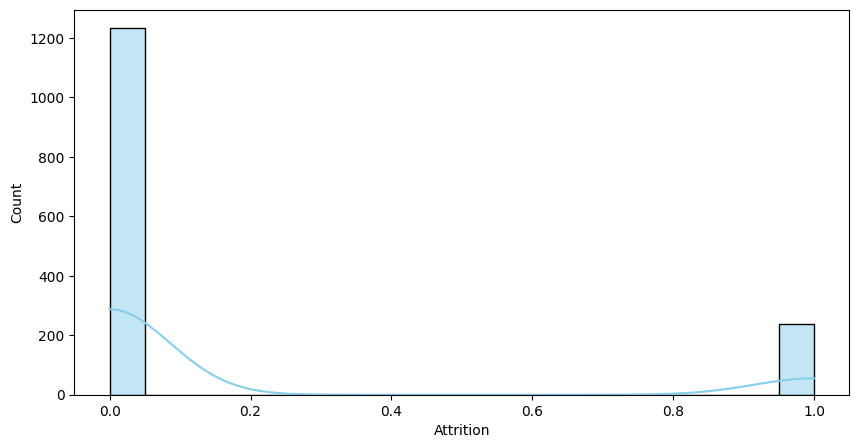

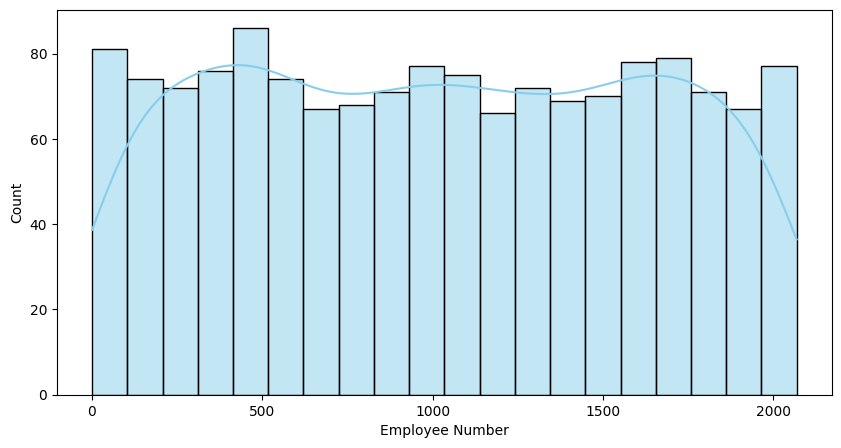

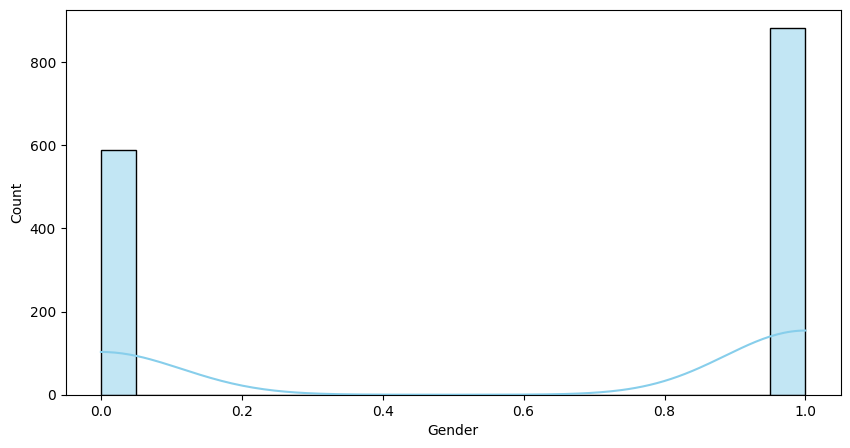

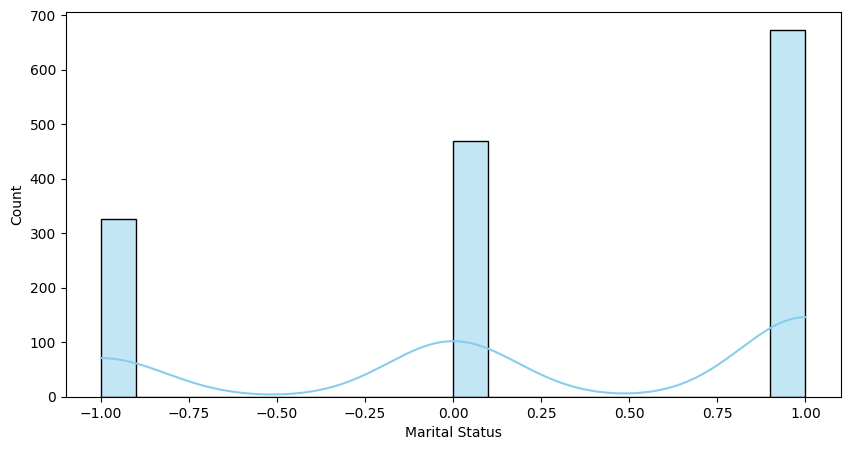

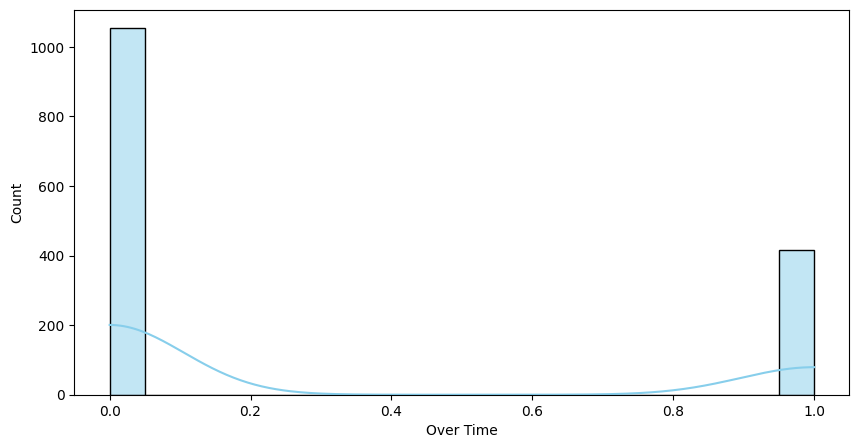

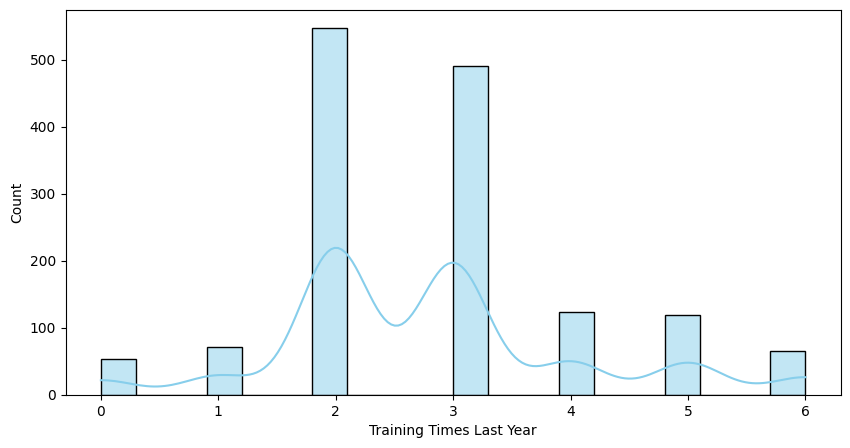

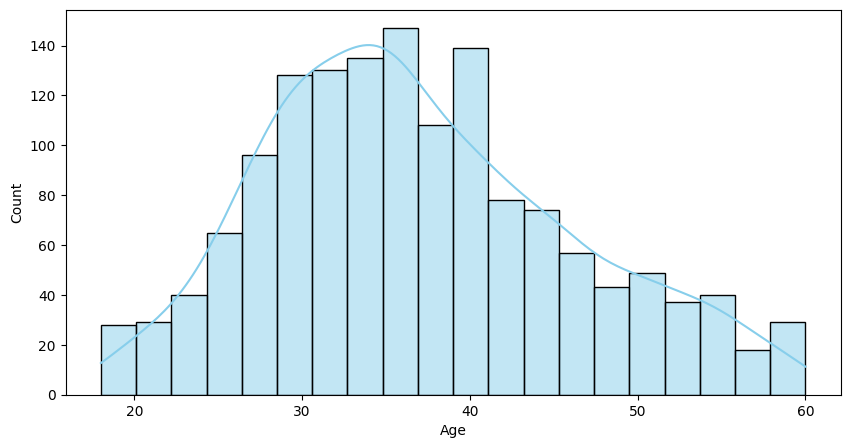

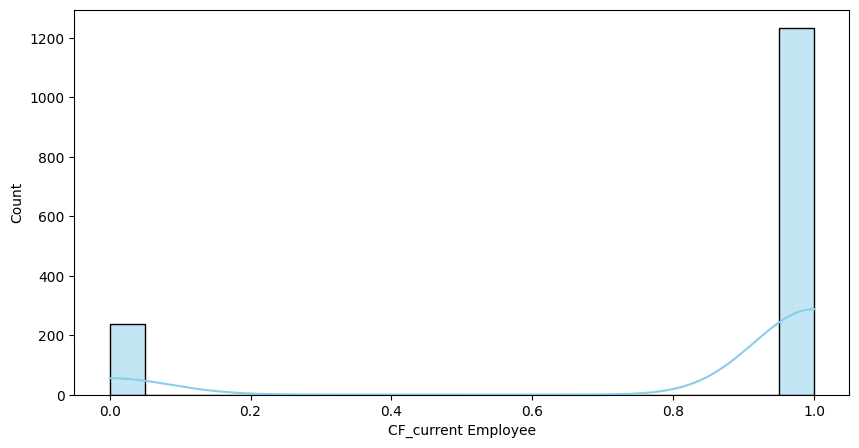

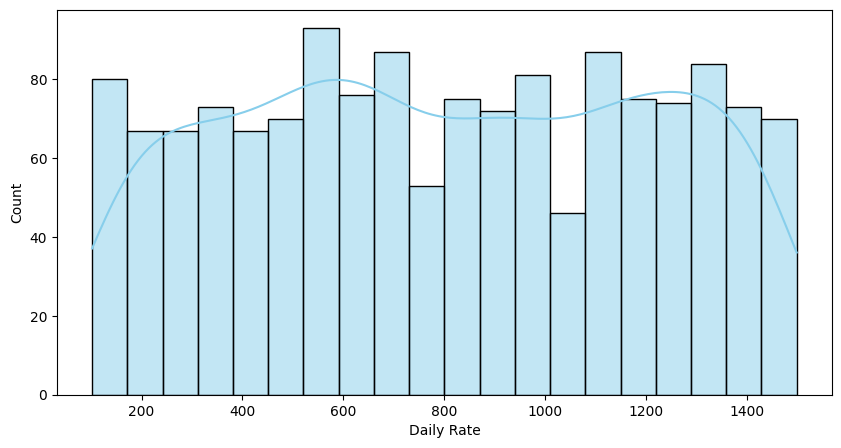

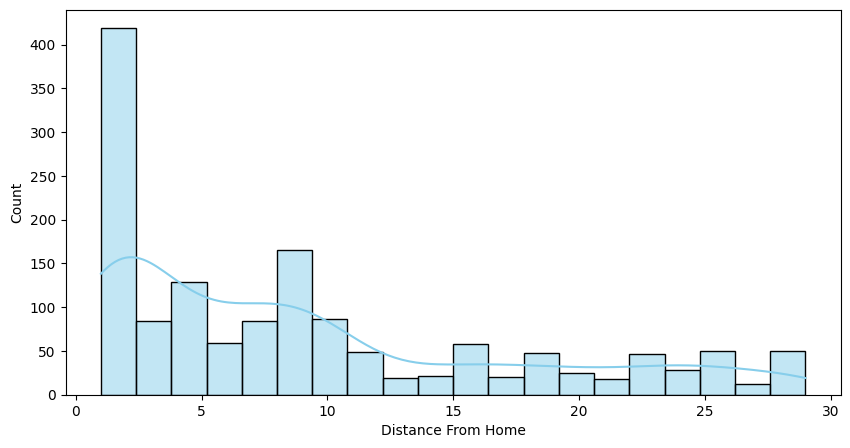

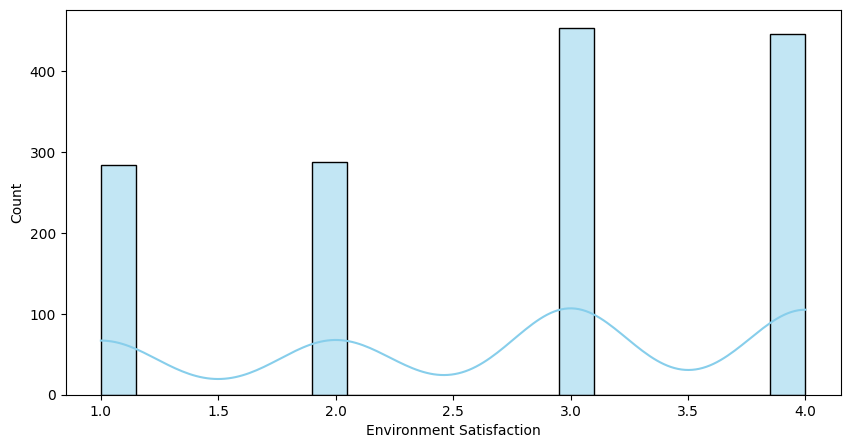

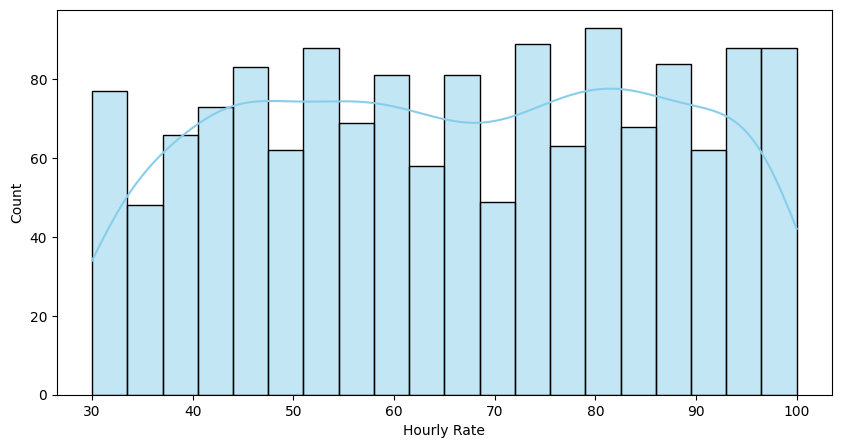

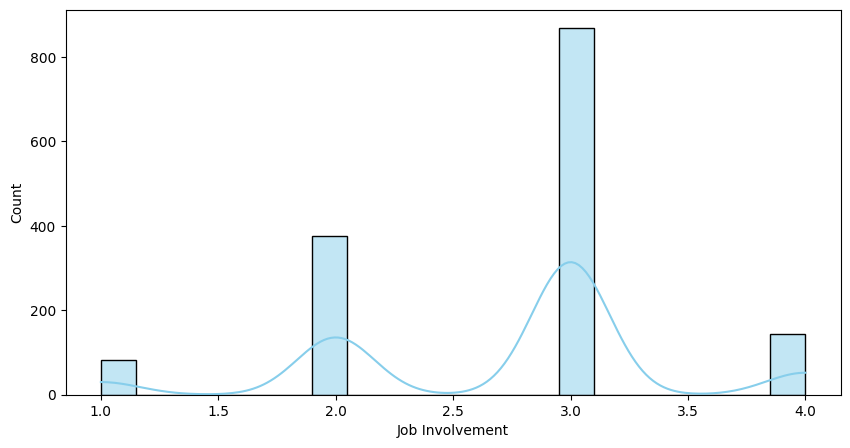

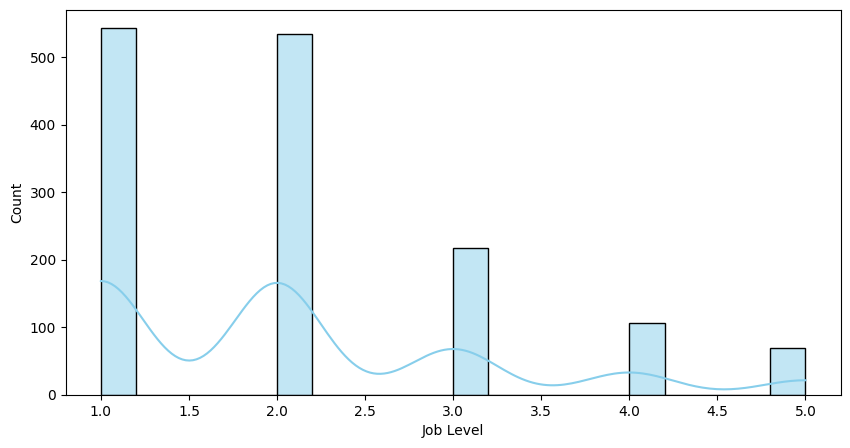

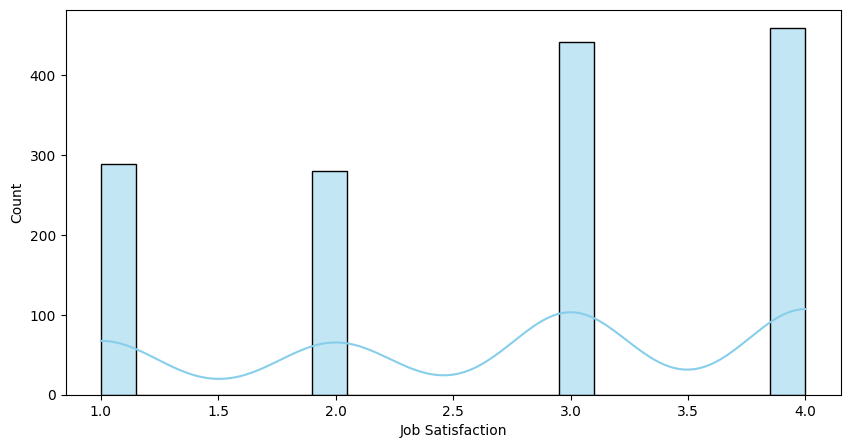

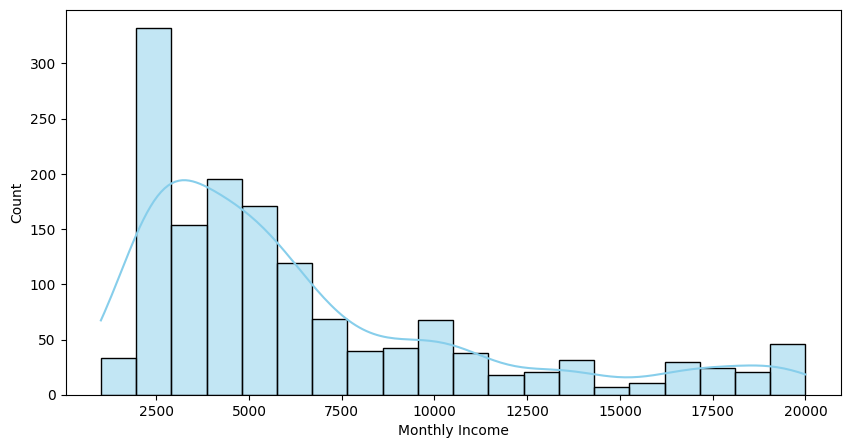

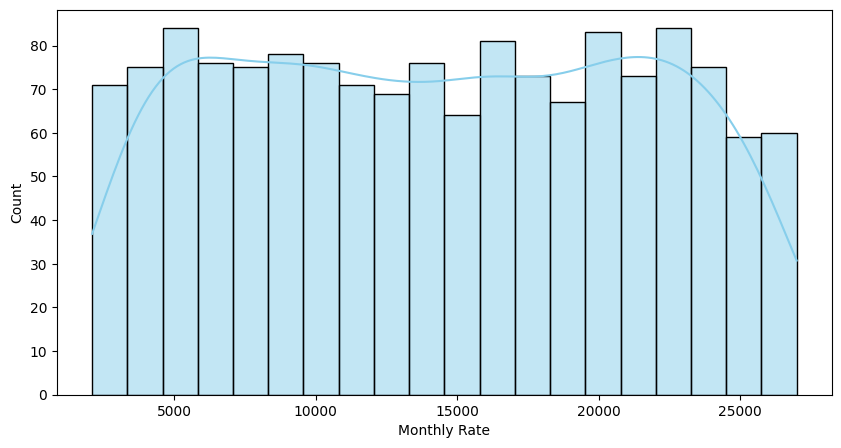

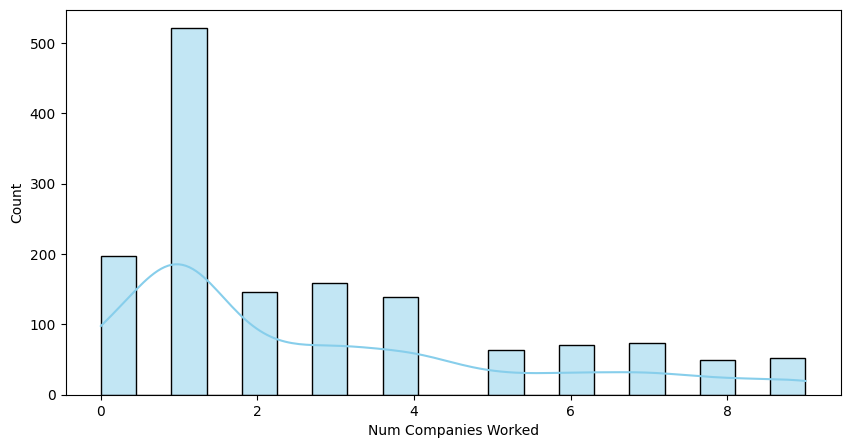

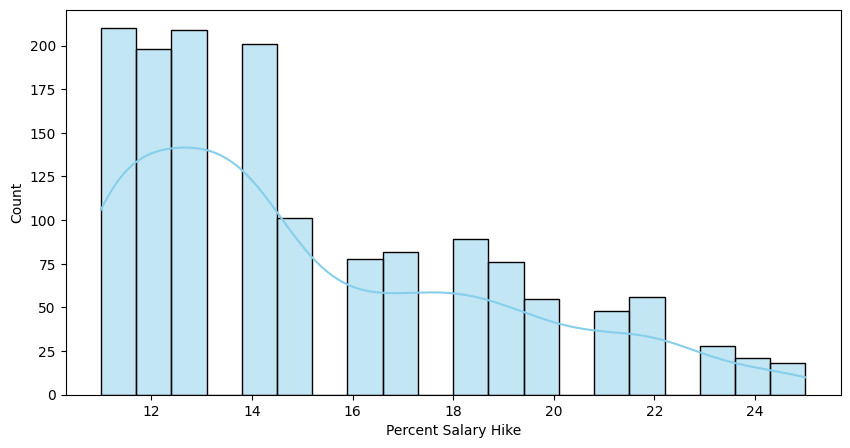

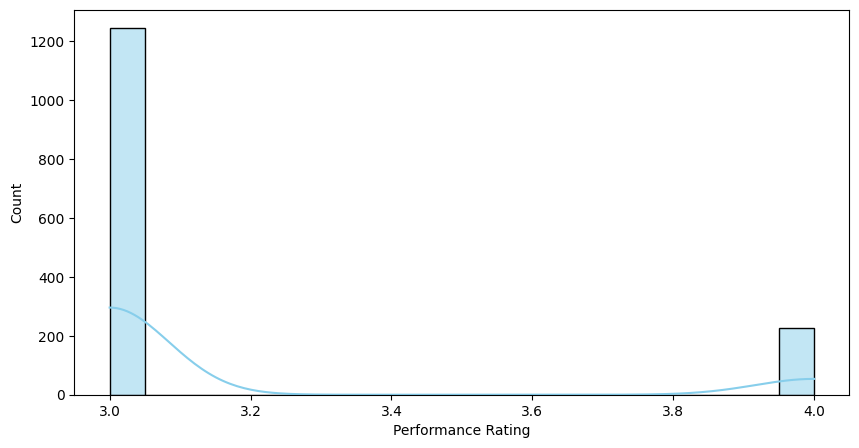

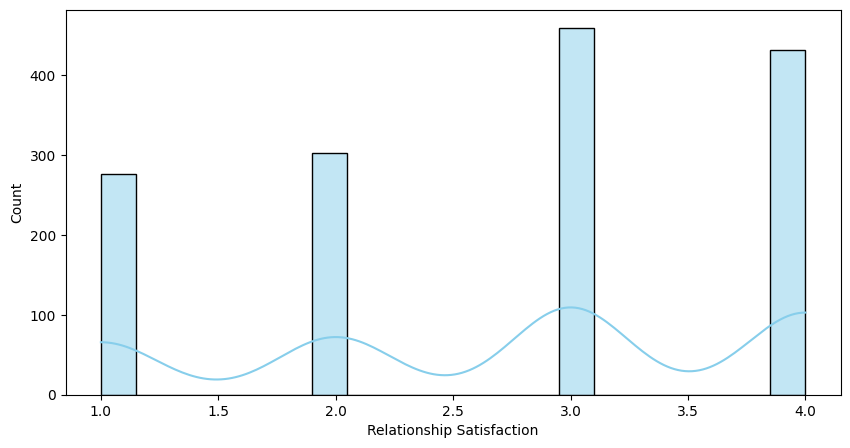

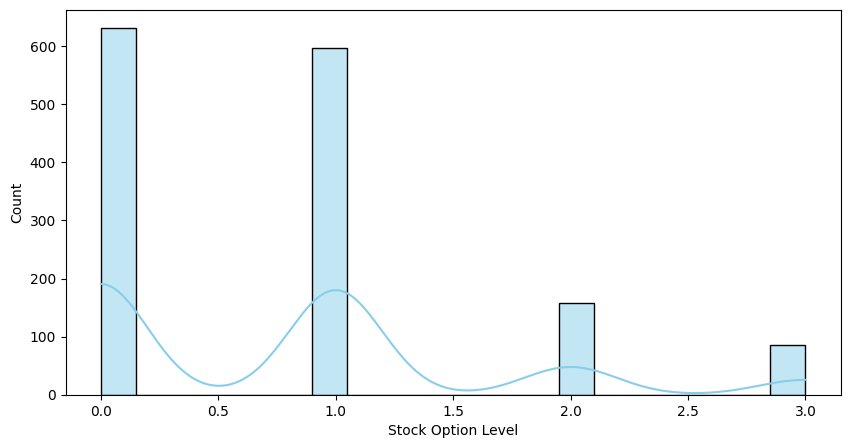

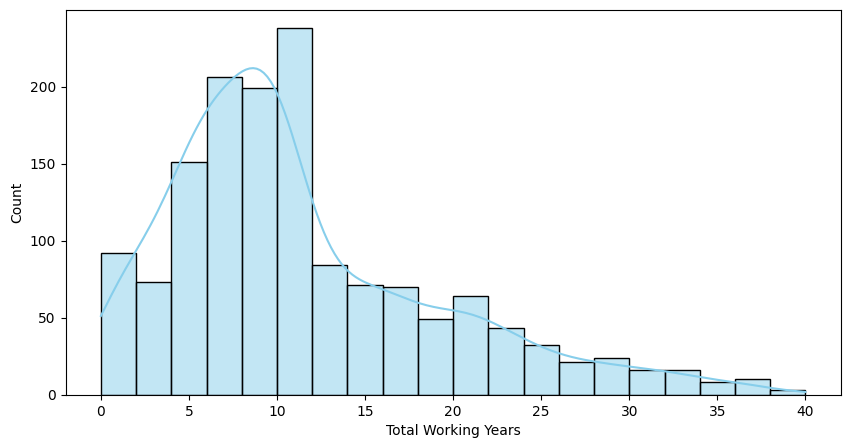

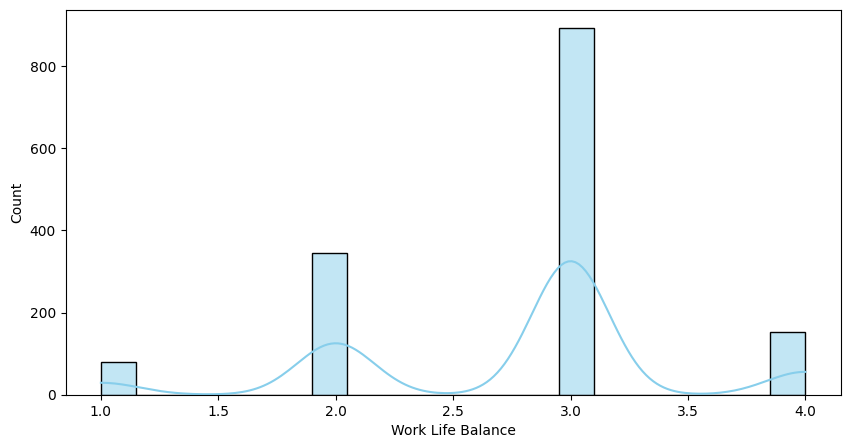

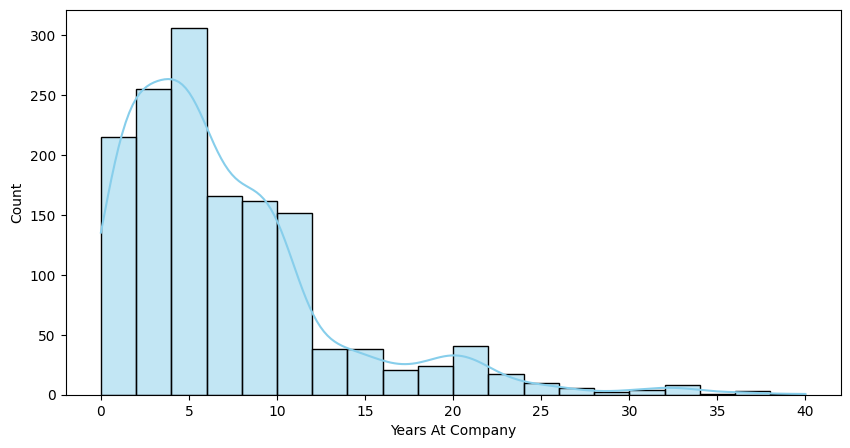

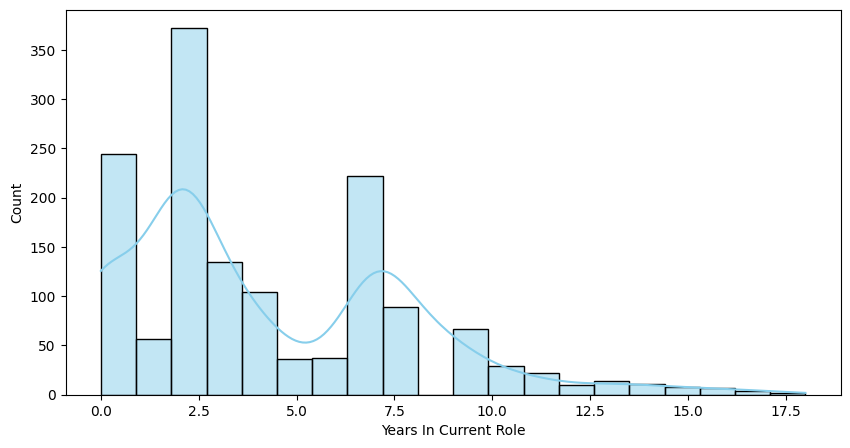

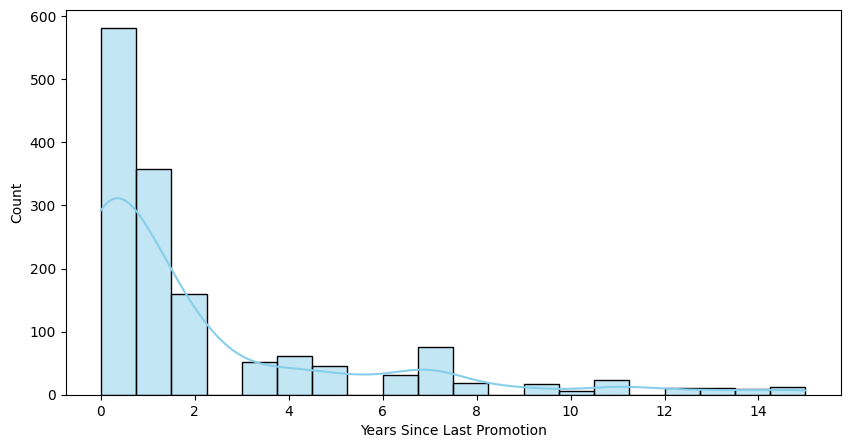

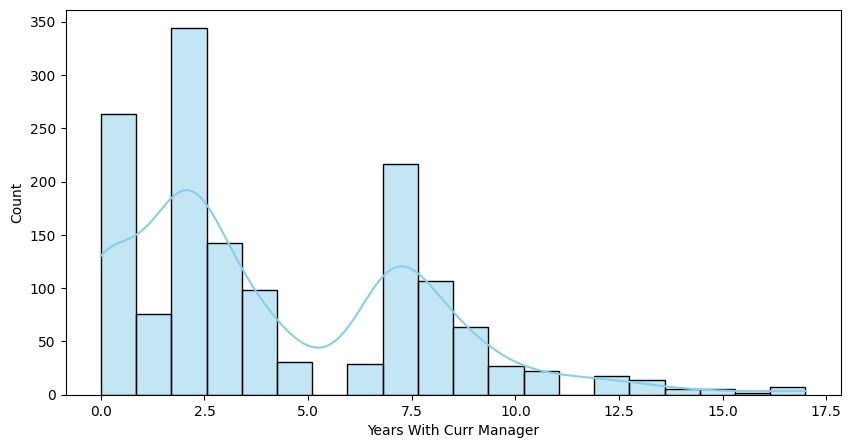

In [71]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.show

## **Bivariate/Multivariate Analysis:**

In [78]:
df.head()

,Attrition,Business Travel,CF_age band,Department,Education Field,Employee Number,Gender,Job Role,Marital Status,Over Time,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,Rarely,35 - 44,Sales,Life Sciences,1,0,Sales Executive,0,1,0,41,0,1102,1,Associates Degree,2,94,3,2,4,5993,19479,8,11,3,1,0,8,1,6,4,0,5
1,0,Frequently,45 - 54,R&D,Life Sciences,2,1,Research Scientist,1,0,3,49,1,279,8,High School,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,10,7,1,7
2,1,Rarely,35 - 44,R&D,Other,4,1,Laboratory Technician,0,1,3,37,0,1373,2,Associates Degree,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,0,0,0,0
3,0,Frequently,25 - 34,R&D,Life Sciences,5,0,Research Scientist,1,1,3,33,1,1392,3,Master's Degree,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,8,7,3,0
4,0,Rarely,25 - 34,R&D,Medical,7,1,Laboratory Technician,1,0,3,27,1,591,2,High School,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,2,2,2,2


In [77]:
df.select_dtypes(include="number").columns

Index(['Attrition', 'Employee Number', 'Gender', 'Marital Status', 'Over Time',
       'Training Times Last Year', 'Age', 'CF_current Employee', 'Daily Rate',
       'Distance From Home', 'Environment Satisfaction', 'Hourly Rate',
       'Job Involvement', 'Job Level', 'Job Satisfaction', 'Monthly Income',
       'Monthly Rate', 'Num Companies Worked', 'Percent Salary Hike',
       'Performance Rating', 'Relationship Satisfaction', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [102]:
# for i in ['Distance From Home', 'Environment Satisfaction', 'Hourly Rate', "Monthly Income", "Total Working Years", "Work Life Balance", "Years Since Last Promotion"]:
#     sns.barplot(data=df, x=i, y="Job Involvement")
#     plt.title(f'Job Involvement vs. {i}')
#     plt.xlabel(i)
#     plt.ylabel('Job Involvement')
#     plt.show()  # This line displays each scatter plot individually

<function matplotlib.pyplot.show(close=None, block=None)>

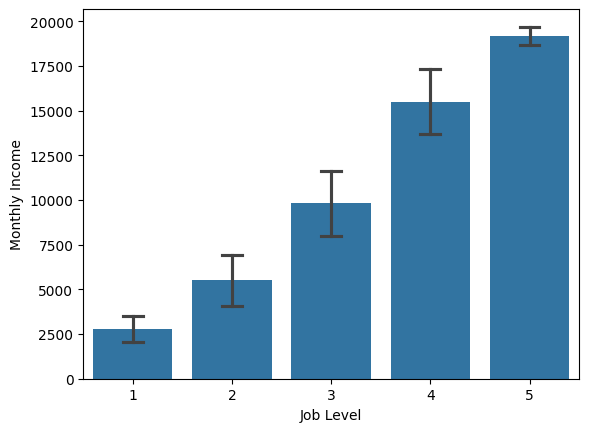

In [101]:
sns.barplot(y='Monthly Income', x='Job Level', ci='sd', capsize=0.2, data=df)
plt.show

<Axes: xlabel='Training Times Last Year', ylabel='Performance Rating'>

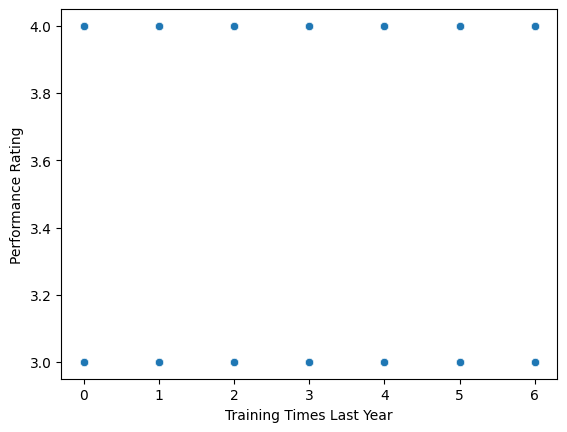

In [103]:
sns.scatterplot(x="Training Times Last Year", y="Performance Rating", data=df)

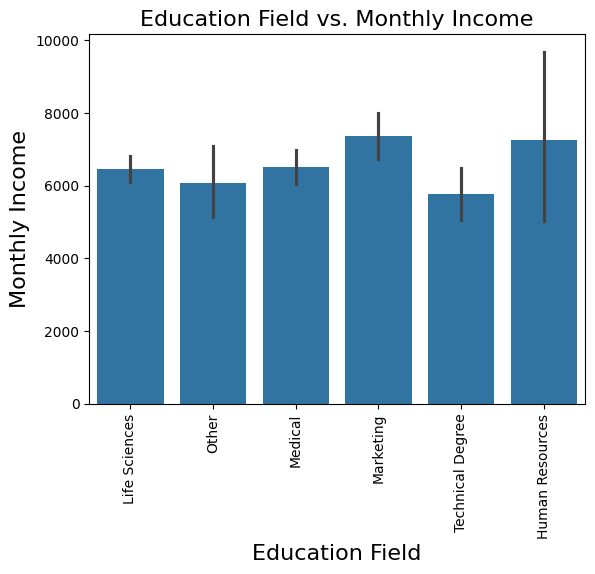

In [110]:
sns.barplot(x="Education Field", y="Monthly Income", data=df)

plt.title("Education Field vs. Monthly Income", fontsize=16)
plt.xlabel("Education Field", fontsize=16)
plt.ylabel("Monthly Income", fontsize=16)
plt.xticks(rotation=90)
plt.show()

## **Outlier detection and handling:**

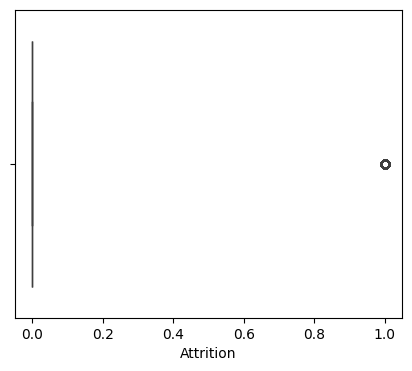

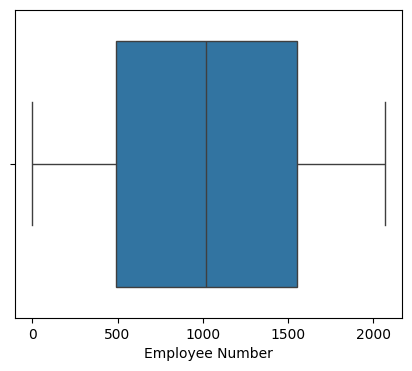

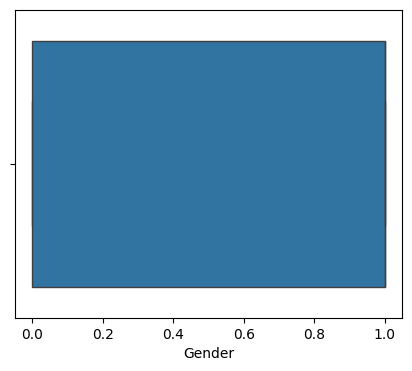

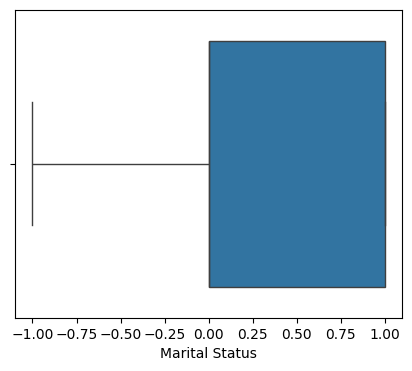

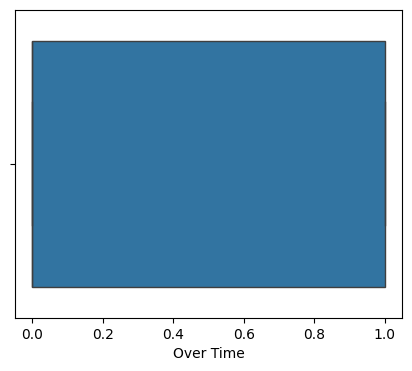

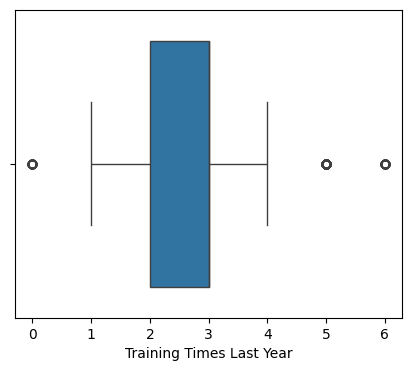

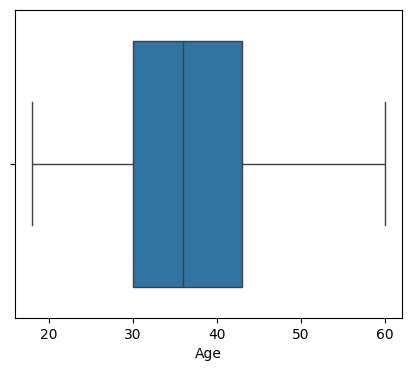

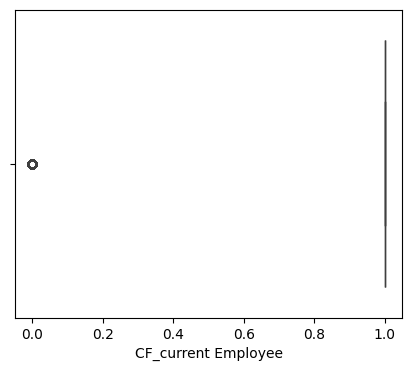

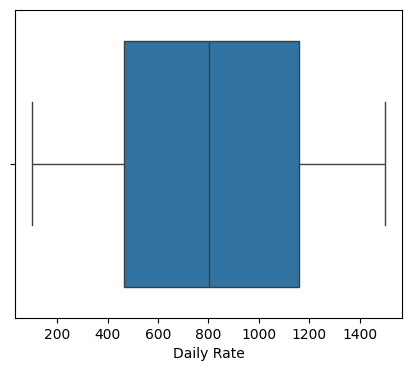

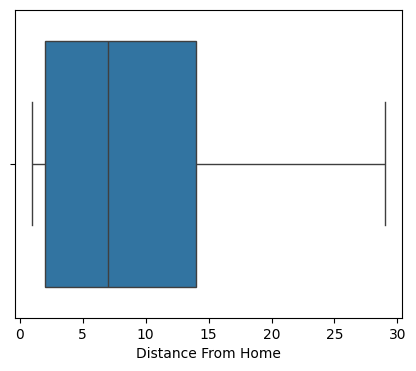

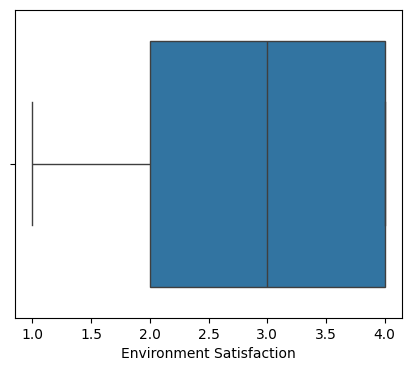

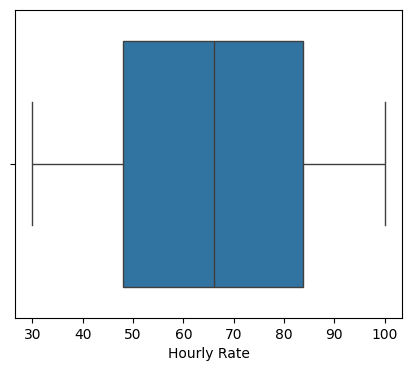

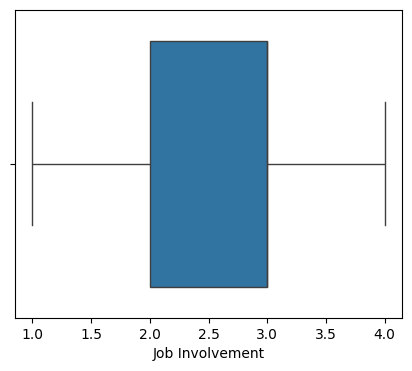

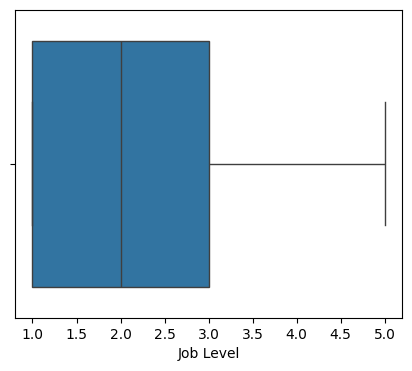

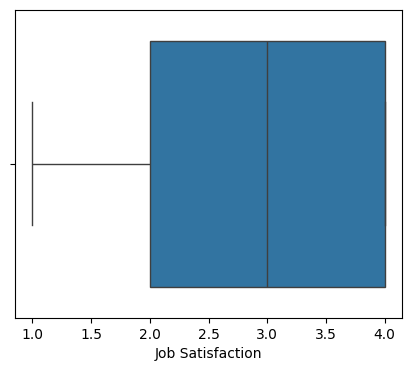

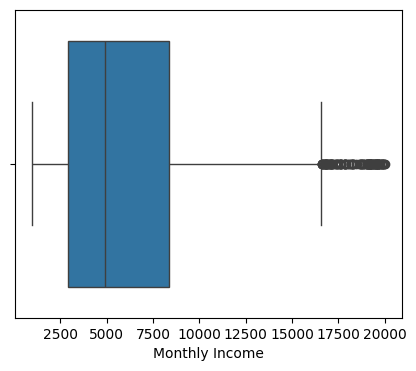

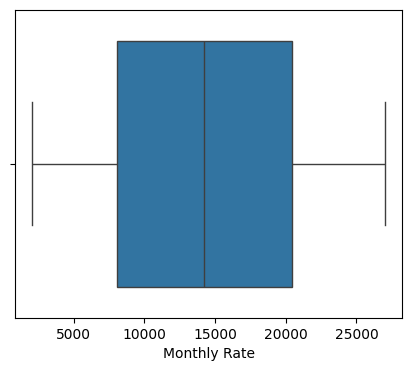

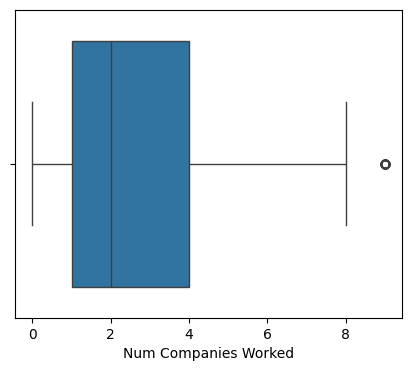

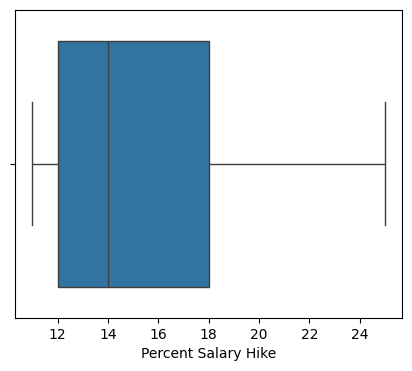

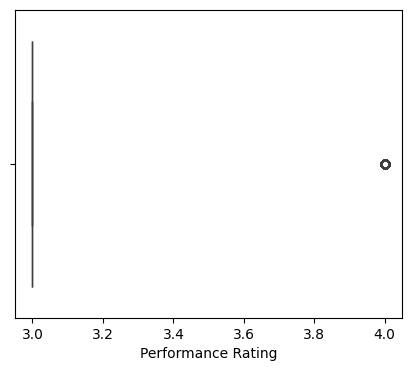

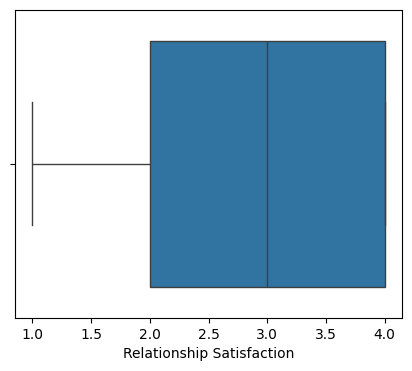

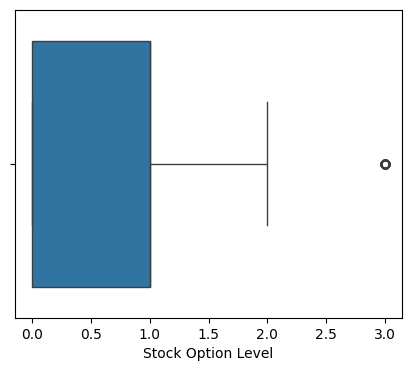

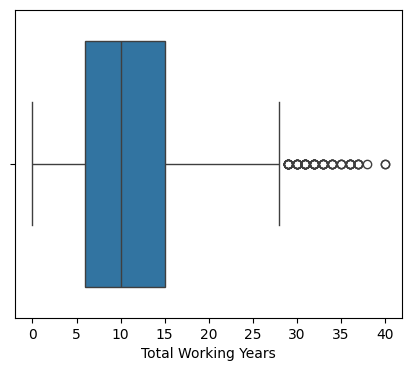

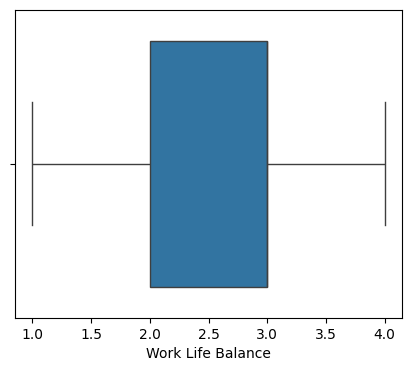

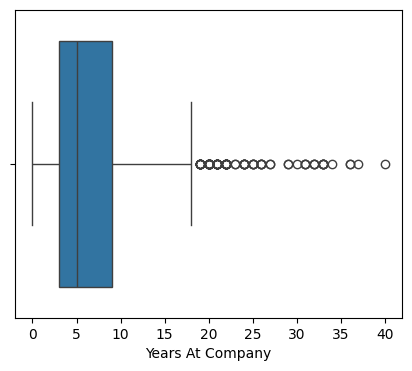

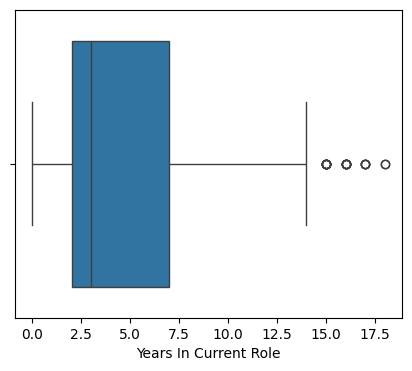

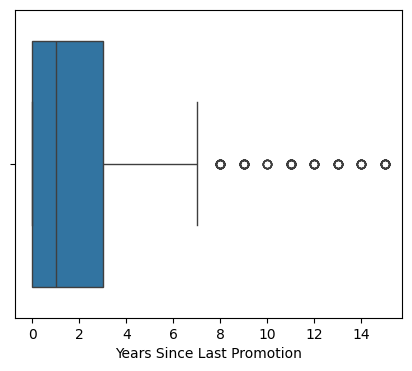

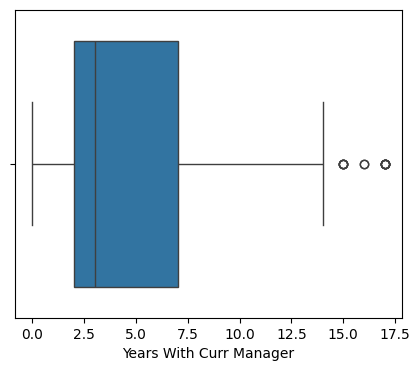

In [72]:
# we can use boxplot for outlier detection
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df, x=i)
    plt.show

In [75]:
df.head(2)

,Attrition,Business Travel,CF_age band,Department,Education Field,Employee Number,Gender,Job Role,Marital Status,Over Time,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,Rarely,35 - 44,Sales,Life Sciences,1,0,Sales Executive,0,1,0,41,0,1102,1,Associates Degree,2,94,3,2,4,5993,19479,8,11,3,1,0,8,1,6,4,0,5
1,0,Frequently,45 - 54,R&D,Life Sciences,2,1,Research Scientist,1,0,3,49,1,279,8,High School,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,10,7,1,7


In [74]:
# since all of the numerical features are discrete, there is no need to perform outlier treatment.

## **Documentaton of useful insights obtained while performing EDA:**